In [21]:
from pathlib import Path as path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
import pdb ### Python debuger
import os ### Navigate Through Dirrectory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [2]:
os.listdir()

['VOCtrainval_06-Nov-2007',
 '.gitignore',
 '.git',
 'Pascal_firstlook.ipynb',
 '.ipynb_checkpoints',
 'VOCtrainval_06-Nov-2007.tar']

In [3]:
imgpth = path(os.listdir()[0])/'VOCdevkit/VOC2007/JPEGImages'

In [4]:
p_json = path(os.listdir()[0])/'VOCdevkit/PASCAL_VOC'

In [5]:
os.listdir(str(p_json))

['pascal_train2012.json',
 'pascal_test2007.json',
 'pascal_val2012.json',
 'pascal_val2007.json',
 'pascal_train2007.json']

In [11]:
with open(str(p_json)+'/'+os.listdir(str(p_json))[4], 'r') as jfile:
    trn = json.load(jfile)

In [12]:
trn.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [13]:
trn['categories'][0]

{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'}

In [14]:
trn['type']

'instances'

In [15]:
print('They are {} classes in the the pascal 2007 dataset'.format(len(trn['categories'])))
print()
categ = {i['id']: i['name'] for i in trn['categories']}
list(categ.values())

They are 20 classes in the the pascal 2007 dataset



['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [16]:
trn['images'][0]

{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12}

In [17]:
print("They are {} images in this training set ".format(len(trn['images'])))
trn_nm = {i['id']:i['file_name'] for i in trn['images']} ### A dictionary of filenames with the id as key

They are 2501 images in this training set 


In [28]:
trn['annotations'][0]

{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
 'area': 34104,
 'iscrowd': 0,
 'image_id': 12,
 'bbox': [155, 96, 196, 174],
 'category_id': 7,
 'id': 1,
 'ignore': 0}

In [49]:
#len(trn['annotations'])
def hw_bb(bb): 
    return np.array([bb[0],bb[1],bb[3]+bb[1]-1,bb[2]+bb[1]-1])

trn_an = collections.defaultdict(lambda:[])
for i in trn['annotations']:
    if not i['ignore']:
        bb = i['bbox']
        bb = hw_bb(bb)
        trn_an[i["image_id"]].append((bb,i['category_id']))
len(trn_an)

2501

Dictionaries

    +trn_nm-  A dictionary of filenames with the id as key
    +trn_an- dictionary of annotations with keys as image id
    +categ - Dictionary of category name with the keys as a category_id with 

In [68]:
t_img = trn['images'][0]
t_ann=trn_an[t_img['id']] ###(hw bounding box and category id )
print(t_ann)

[(array([155,  96, 269, 291]), 7)]


In [69]:
categ[t_ann[0][1]]### category

'car'

In [70]:
def bb_hw(ann):
    return np.array([a[1], a[0], a[3]-a[1], a[2]-a[0]])

In [72]:
t_img['file_name']

'000012.jpg'

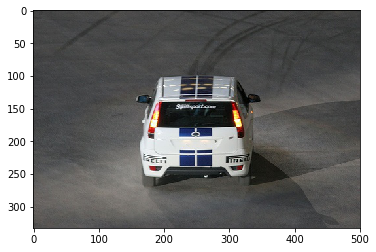

In [77]:
img = plt.imread(str(imgpth)+'/'+t_img['file_name'])
plt.imshow(img)
plt.show()

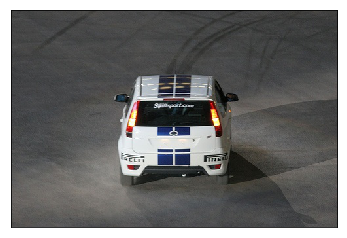

In [81]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)